## Name: [  Mazen Mobtasem Mohamed  ]
## ID: [ 18100142  ]

# <center><font color=darkred>Lab 4 </font>

# Lab Goals:
    1. Quick overview of some examples in lecture3.
    2. Work with hands-on examples in Image representation and filtering in frequancy domain.

# <font color=darkred size=4>1-Needed Packages

In [1]:
from skimage import data, io
from matplotlib import pyplot as plt
import numpy as np
from skimage import img_as_ubyte,img_as_float
from skimage import data, io, filters
from matplotlib.pyplot import imshow, show, subplot, title, get_cmap, hist
from scipy import ndimage
from scipy.fftpack import fft , fft2 ,fftshift , ifftshift , ifft2


### 1. Discrete Fourier Transform:
     
     The general idea is that the image (f(x,y) of size M x N) will be represented in the frequency domain (F(u,v)). 
    1-The equation for the two-dimensional discrete Fourier transform (DFT) in below image.
    2- The inverse of the above discrete Fourier transform also in below image.
    3- we visually analyze a Fourier transform by computing a Fourier spectrum (the magnitude of F(u,v)) and display it as an image.The Fourier spectrum is symmetric about the origin. 


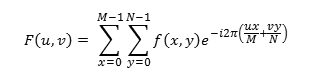

In [ ]:
from IPython.display import Image
Image(filename='D:\\Digital image processing files Asmaa\\DFT.PNG')

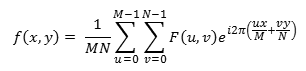

In [ ]:
from IPython.display import Image
Image(filename='D:\\Digital image processing files Asmaa\\IDFT.PNG')

### 2. The fast Fourier transform (FFT):
     
     - The fast Fourier transform (FFT) is a fast algorithm for computing the discrete Fourier transform.
     - Python has three functions to compute the DFT:
        1- fft  :for one dimension (useful for audio)
        2- fft2 :for two dimensions (useful for images) 
        3- fftn :for n dimensions
     - Python has three related functions that compute the inverse DFT: 
        1- ifft
        2- ifft2
        3- ifftn

      


# Task 1:Create a black image with a white rectangle in it and display fourier spectrum ?

In [ ]:
#1-Create a black image with a white rectangle in it.
#2-Calculate the DFT. 
#3-Use the abs function
#4-To create a sampling of the Fourier transform, 
#you can add zero padding to img when computing its DFT
#5-The zero-frequency coefficient is displayed in the 
#upper left hand  corner. To display it in the center,
#you can use the function fftshift.
#6-In Fourier transforms, high peaks are so high they 
#hide details. Reduce contrast with the log function.

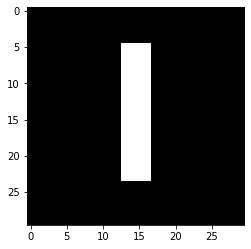

In [2]:
#Create a black 30x30 image
f= np.zeros((30,30), np.uint8)

#With a white rectangle in it.
f[5:24,13:17]= 255

plt.imshow(f,'gray',vmin=0, vmax=255 )

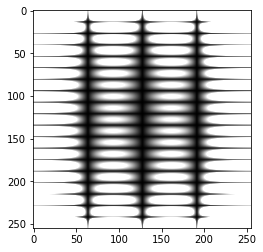

In [3]:
F=fft2(f, (255,255))

#There are real and imaginary parts to F.
#Use the abs function to compute the magnitude of the combined components.
F2=np.abs(F)
plt.imshow(F2,'gray',vmin=0, vmax=255 )   # Non centered spectrum

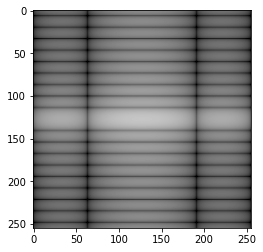

In [4]:
F=fft2(f, (255,255))
F2=fftshift(F)

F2=np.abs(F2)
Magnitude_spectrum = 20*np.log(F2)
plt.imshow(Magnitude_spectrum,'gray',vmin=0, vmax=255 )

# Task 1:Display a Fourier spectrum on camera man image ?

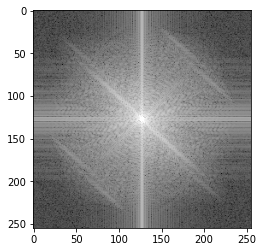

In [6]:
img1 = data.camera()
F=fft2(img1, (255,255))
F2=fftshift(F)

F2=np.abs(F2)
Magnitude_spectrum = 20*np.log(F2)
plt.imshow(Magnitude_spectrum,'gray',vmin=0, vmax=255 )

# Apply ideal high pass Filter on img in the Frequency Domain?

[[-1  0  1]
 [-2  0  2]
 [-1  0  1]]
(509, 509)


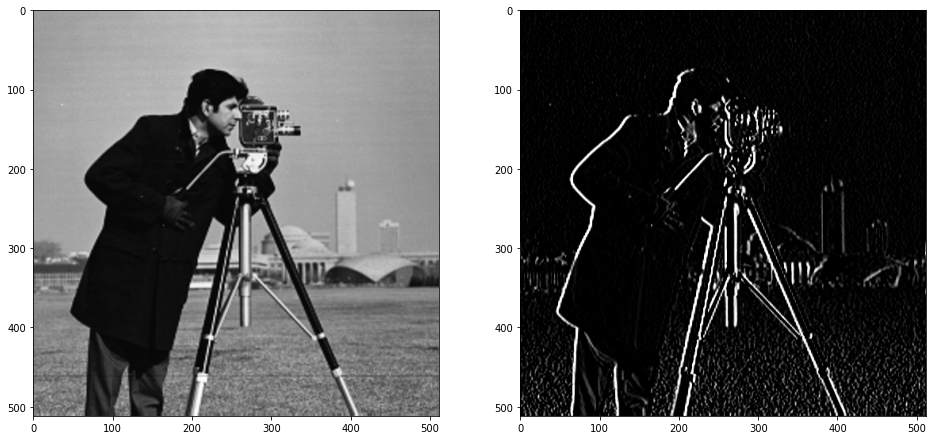

In [7]:

img= data.camera()                 # Img is already numpy array

# kernel (3,3) / 9
kernel=np.array([[-1,0,1],[-2,0,2],[-1,0,1]])
print(kernel)

sz = (img.shape[0] - kernel.shape[0], img.shape[1] - kernel.shape[1])  # total amount of padding
print(sz)
kernel = np.pad(kernel, (((sz[0]+1)//2, sz[0]//2), ((sz[1]+1)//2, sz[1]//2)), 'constant') # To pad 0 on ((top, bottom), (left, right))


kernel = fftshift(kernel)

filtered = np.real(ifft2(fft2(img) * fft2(kernel)))+ np.imag(ifft2(fft2(img) * fft2(kernel)))  # real and imaginary part
filtered = np.maximum(0,np.minimum(filtered,255))           # To Keep high frequencies and remove low frequencies

fig, (ax1,ax2) = plt.subplots(1, 2)
fig.set_size_inches(16, 8)
ax1.imshow(img ,cmap=plt.cm.gray)
ax2.imshow(filtered ,cmap=plt.cm.gray)
plt.show()

# Task 2: Apply low pass filter on img in the frequency domain ?

In [ ]:
# Don't use built in Pad function, Do the imlementation of it and then apply ideal low pass filter.

[[0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04]]
(507, 507)


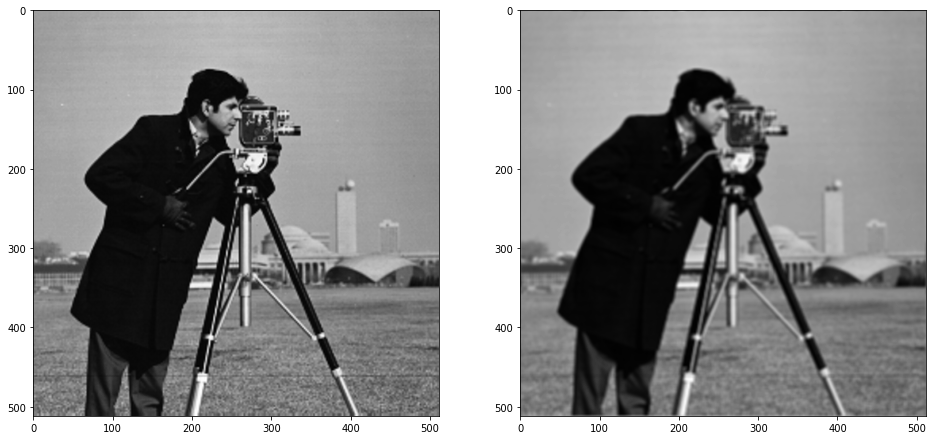

In [9]:

img= data.camera()                 # Img is already numpy array

# kernel (3,3) / 9
kernel=np.array([[1/25,1/25,1/25,1/25,1/25],[1/25,1/25,1/25,1/25,1/25],[1/25,1/25,1/25,1/25,1/25],[1/25,1/25,1/25,1/25,1/25],[1/25,1/25,1/25,1/25,1/25]])
print(kernel)

sz = (img.shape[0] - kernel.shape[0], img.shape[1] - kernel.shape[1])  # total amount of padding
print(sz)
kernel = np.pad(kernel, (((sz[0]+1)//2, sz[0]//2), ((sz[1]+1)//2, sz[1]//2)), 'constant') # To pad 0 on ((top, bottom), (left, right))

kernel = fftshift(kernel)

filtered = np.real(ifft2(fft2(img) * fft2(kernel)))+ np.imag(ifft2(fft2(img) * fft2(kernel)))  # real and imaginary part
filtered = np.maximum(0,np.minimum(filtered,255))           # To Keep high frequencies and remove low frequencies

fig, (ax1,ax2) = plt.subplots(1, 2)
fig.set_size_inches(16, 8)
ax1.imshow(img ,cmap=plt.cm.gray)
ax2.imshow(filtered ,cmap=plt.cm.gray)
plt.show()